# Proyecto Webscraping

#### Extracción de datos de nombre y precio de medicamentos en oferta publicados en https://www.drogueriascafam.com.co

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib


def formatear_precio(precio):
    '''Para reemplazar caracteres y formatear según un patrón los precios'''
    return precio.replace('$', '').replace('.', '')


def eliminar_palabra(lista):
    '''Eliminar palabras extra de los precios'''
    nueva_lista = []
    for elemento in lista:
        nuevo_string = re.sub(r'[^\d]', '', elemento)
        nueva_lista.append(nuevo_string.strip())
    return nueva_lista


def exportar_csv(data):
    '''Transformar los datos obtenidos a dataframe'''
    df = pd.DataFrame(data)
    df.to_csv("data.csv", index=False)


def webscraping():
    diccionario = {'nombre': [],
                'precio': []}
    
    '''Iterar sobre la cantidad de paginas de ofertas'''
    for i in range(1,4):
        url_base = f'https://www.drogueriascafam.com.co/69-ofertas-destacadas-del-mes?page={i}'

        r = requests.get(url_base)
        # "parseamos" el contenido: Analizamos archivos de texto formateados en HTML
        soup = BeautifulSoup(r.content, 'html.parser')

        ''' URL contiene diferentes paginas. Queremos iterar en todas ellas, por lo que necesito encontrar un patron donde se encuentre la información para poder iterarlas. este patron se encuentra en las etiquetas 'li', que están dentro de una etiqueta 'ul' con clase 'page-list flex-container' '''
        ul = soup.find("ul", {"class": "page-list flex-container"}).find_all("li")

        '''dentro de cada etiqueta articulos se encuentra la información que necesitamos'''
        all_products = soup.find_all('article')
        for product in all_products:
            nombre = product.find('div', {'class': 'thumbnail-container relative'}).find('div', {'class': 'product-desc-wrap'}).find('div', {'class': 'product-description relative clearfix'}).find('div', {'class': 'name-product-list'}).find('h3').text.strip()
            precio = formatear_precio(product.find('div', {'class': 'thumbnail-container relative'}).find('div', {'class': 'product-price-and-shipping'}).find('span', {'class': 'price'}).text)
            diccionario['nombre'].append(nombre)
            diccionario['precio'].append(precio)    
        
    nuevo_precio = eliminar_palabra(diccionario['precio'])
    diccionario['precio'] = nuevo_precio
    return diccionario


#### Ejecutamos el código

In [3]:
if __name__ == "__main__":
    data = webscraping()
    exportar_csv(data)

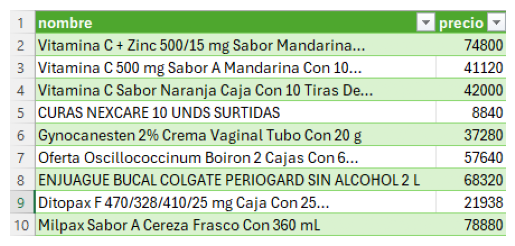

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carga la imagen
img = mpimg.imread('C:/Users/cquir/OneDrive/Fotos/Capturas de pantalla/1.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()